# SALES ANALYSIS
### Libraries

In [16]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [17]:
repo = '.\Sales_Data' 

### Merging files in one

In [18]:
files = [file for file in os.listdir(repo)]

all_months = pd.DataFrame()

for file in files:
    df = pd.read_csv(repo + '\\' + file)
    all_months = pd.concat([all_months, df])

all_months.to_csv('alldata.csv', index=False)
    


### Read in an update dataframe

In [19]:
alldata = pd.read_csv('alldata.csv')
alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Cleanup data

### Drop NaN

In [20]:
alldata = alldata.dropna(how='all')
alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Finding and Deletimg 'Or'

In [21]:
alldata = alldata[alldata['Order Date'].str[0:2] != 'Or']
alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Convert types

In [22]:
alldata['Quantity Ordered'] = pd.to_numeric(alldata['Quantity Ordered']) #Make int
alldata['Price Each'] = pd.to_numeric(alldata['Price Each']) # Mahe float 

## Adding columns

##### Add month column

In [23]:
alldata['Month'] = alldata['Order Date'].str[0:2]
alldata['Month'] = alldata['Month'].astype('int32')

##### Add sales column

In [24]:
alldata['Sales'] = alldata['Quantity Ordered'] * alldata['Price Each']
alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Add City column

In [25]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2]

#alldata = alldata.drop(columns='State')

alldata['City'] = alldata['Purchase Address'].apply(lambda x: get_city(x) + ' ' + get_state(x))

alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA 02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA 90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA 90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA 90001


### Mejor mes y cuánto se ganó.

In [26]:
results = alldata.groupby('Month').sum()

<function matplotlib.pyplot.show(close=None, block=None)>

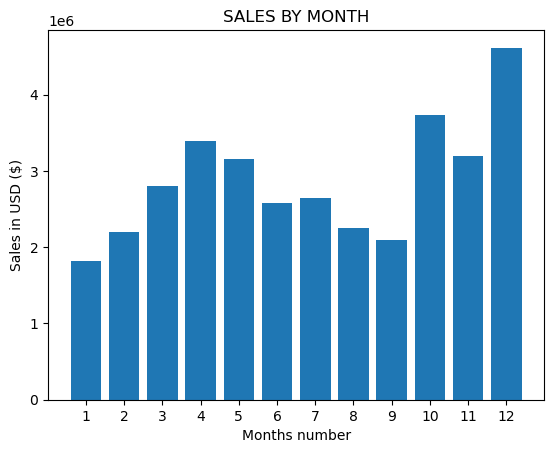

In [27]:
months = range(1,13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Months number')
plt.title('SALES BY MONTH')
plt.show

### Ciudad con el mayor número de ventas

<function matplotlib.pyplot.show(close=None, block=None)>

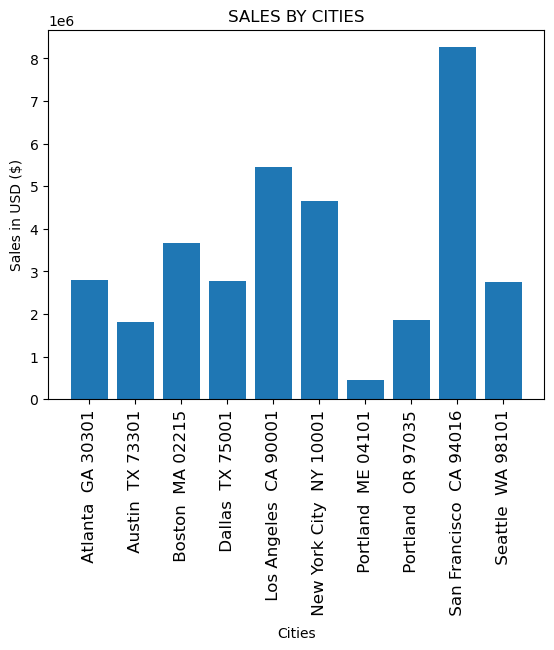

In [28]:
results = alldata.groupby('City').sum()
cities = [city for city, df in alldata.groupby('City')]

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation='vertical',size=12)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Cities')
plt.title('SALES BY CITIES')
plt.show

#### A qué hora mostrar publicidades

In [29]:
alldata['Order Date'] = pd.to_datetime(alldata['Order Date'])

In [30]:
alldata['Hour'] = alldata['Order Date'].dt.hour
alldata['Minute'] = alldata['Order Date'].dt.minute
alldata.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX 75001,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA 02215,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA 90001,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA 90001,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA 90001,9,27


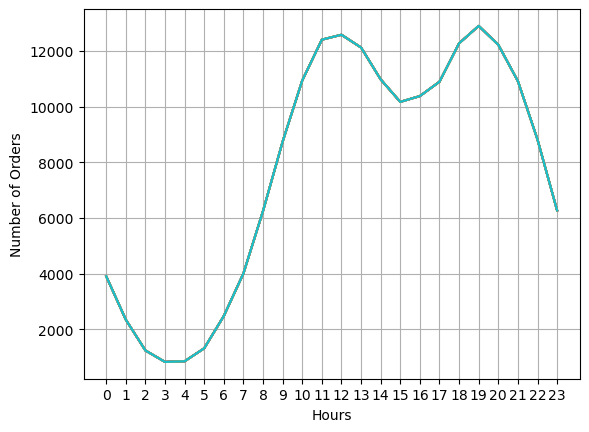

In [31]:
from itertools import groupby


hours = [hour for hour, df in alldata.groupby('Hour')]
plt.plot(hours, alldata.groupby(alldata['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

#### Producos que se venden juntos mas a menudo

In [32]:
df = alldata[alldata['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head()

C:\Users\Fecca\AppData\Local\Temp\ipykernel_13864\1385160626.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [33]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

for key, value in count.most_common(12):
    print(key,value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
('Lightning Charging Cable', 'Apple Airpods Headphones') 81
('Vareebadd Phone', 'Bose SoundSport Headphones') 80


#### Producto mas vendido y por qué.

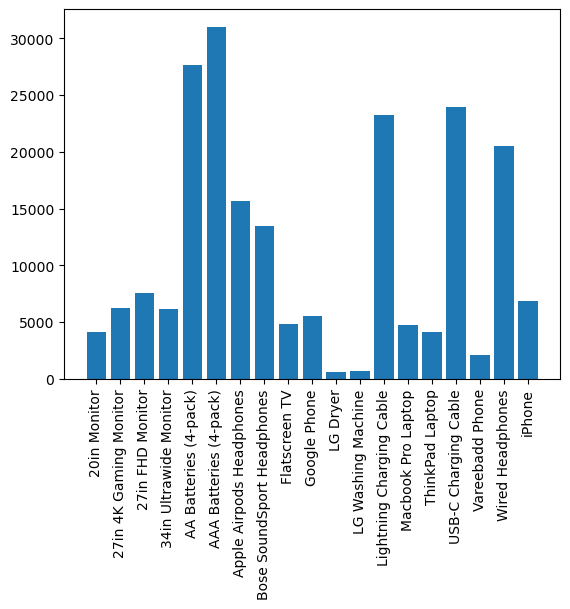

In [34]:
dfproduct = alldata.groupby('Product')
qOrder = dfproduct.sum()['Quantity Ordered']
products = [product for product, df in dfproduct]

plt.bar(products, qOrder)
plt.xticks(products, rotation='vertical')
plt.show()


C:\Users\Fecca\AppData\Local\Temp\ipykernel_13864\230944650.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation='vertical')


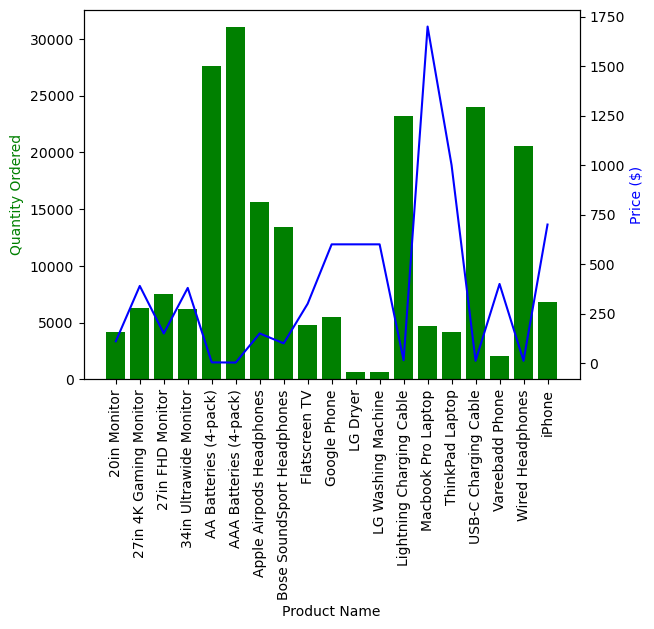

In [35]:
prices = alldata.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, qOrder,color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_xticklabels(products,rotation='vertical')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color= 'b')

plt.show()
